# The IMDB Dataset

---

### Colab Note

Don't forget that you can link your notebook to your drive and save your work there. Then you can download and backup your models, reload them to keep training them, or upload datasets to your drive.


```python
import os
import sys

if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('drive/My Drive/') # 'My Drive' is the default name of Google Drives
    os.listdir()

# use os.chdir("my-directory") # to change directory, and
# os.listdir()                 # to list its contents
# os.getcwd()                  # to get the name of the current directory
# os.mkdir("my-new-dir")       # to create a new directory
# See: https://realpython.com/working-with-files-in-python/

# You can also use bash commands directly, preceded by a bang
# !ls
# However, the following will *not* change the Python directory
# the notebook points to (use os.chdir for that)!
# !cd my-directory
```

## 1. Theory

Make sure you understand the first video of 3Blue1Brown's introduction to neural nets, and ask questions if there's anything unclear.

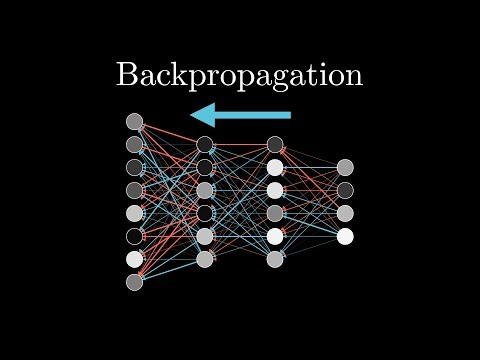

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ilg3gGewQ5U', width=853, height=480) # 3Blue1Brown 3

The fourth video is optional.

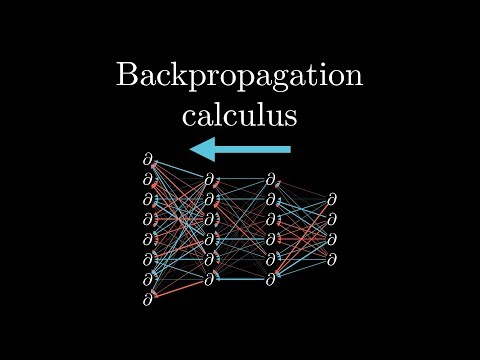

In [ ]:
YouTubeVideo('tIeHLnjs5U8', width=853, height=480) # 3Blue1Brown 4

---

## 2. Practice

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### For reproducible results

In Keras ([source](https://keras.io/examples/keras_recipes/reproducibility_recipes/)):
```python
tf.keras.utils.set_random_seed(812) # See below

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()
```

Note: `tf.keras.utils.set_random_seed` will do the following ([source](https://github.com/keras-team/keras/blob/f6c4ac55692c132cd16211f4877fac6dbeead749/keras/src/utils/rng_utils.py#L10)):

```python
import random
random.seed(42)

import numpy as np
np.random.seed(42)

tf.random.set_seed(42) # can be any number
```

### IMDB Set-up

In [98]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results


# load the IMDB dataset (max review length
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

# preprocess
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# split training set into train & validation
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]
x_val = x_train[:10000]
y_val = y_train[:10000]

In [5]:
# build
model = tf.keras.models.Sequential()
model.add(tf.keras.Input((10000,)))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

Sanity check, how does our network perform before training (use `.evaluate` on `partial_x_train, partial_y_train`). Is the accuracy a value you would expect?

In [8]:
result = model.evaluate(x_test, y_test)
print(f"Loss: {result[0]}, accuracy: {result[1]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.4963 - loss: 0.6951
Loss: 0.6953878402709961, accuracy: 0.49296000599861145


Now we can train.

In [9]:
# save data from training into the 'history' object
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val),
)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7755 - loss: 0.5048 - val_accuracy: 0.8582 - val_loss: 0.3371
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9214 - loss: 0.2179 - val_accuracy: 0.8883 - val_loss: 0.2751
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9481 - loss: 0.1542 - val_accuracy: 0.8800 - val_loss: 0.2991
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9614 - loss: 0.1171 - val_accuracy: 0.8822 - val_loss: 0.3273
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9714 - loss: 0.0877 - val_accuracy: 0.8785 - val_loss: 0.3494
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9777 - loss: 0.0716 - val_accuracy: 0.8766 - val_loss: 0.4002
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9846 - loss: 0.0550 - val_accuracy: 0.8687 - val_loss: 0.4464
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9882 - loss: 0.0412 - val_accuracy: 0.

### Visualise your results

Thanks to these plots, it is easier to spot the epoch (epoch number) where our net reached peak performance (lowest *validation loss*/highest *validation accuracy*, prioritising accuracy if the two are not the same).

Think about what would be a good strategy to keep your code as organised as possible as you run many experiments?

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [11]:
history_dict["loss"]

[0.4019647538661957,
 0.21988129615783691,
 0.1615704596042633,
 0.12587764859199524,
 0.09890422970056534,
 0.07980691641569138,
 0.060690514743328094,
 0.04723145812749863,
 0.03475303575396538,
 0.026648487895727158,
 0.01861792616546154,
 0.01406192872673273,
 0.008658665232360363,
 0.005491726100444794,
 0.0038305888883769512,
 0.0020048986189067364,
 0.0020129310432821512,
 0.0009054160327650607,
 0.0006305694696493447,
 0.00025081419153138995]

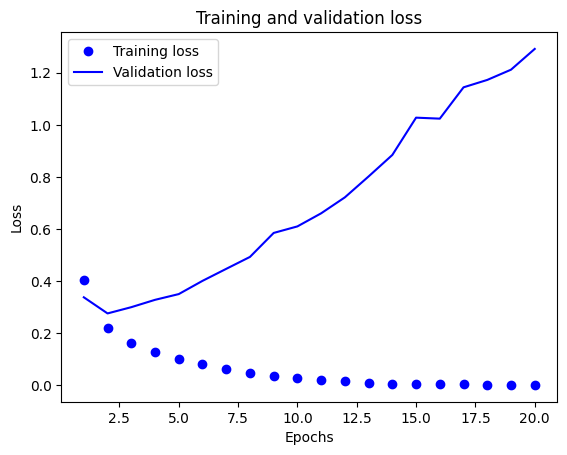

In [12]:
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss) + 1)

blue_dots = "bo"
solid_blue_line = "b"

plt.plot(epochs, loss, blue_dots, label="Training loss")
plt.plot(epochs, val_loss, solid_blue_line, label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [13]:
history_dict["accuracy"]

[0.8416666388511658,
 0.9187333583831787,
 0.940666675567627,
 0.9556666612625122,
 0.9646666646003723,
 0.9728000164031982,
 0.9806666374206543,
 0.9847333431243896,
 0.9896000027656555,
 0.9919999837875366,
 0.9945999979972839,
 0.996399998664856,
 0.9981333613395691,
 0.9991333484649658,
 0.9994000196456909,
 0.9998666644096375,
 0.9995999932289124,
 0.9999333620071411,
 0.9999333620071411,
 1.0]

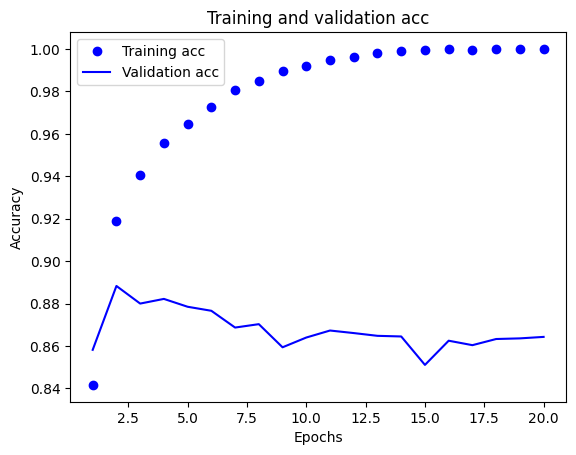

In [14]:
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1, len(acc) + 1)

blue_dots = "bo"
solid_blue_line = "b"

plt.plot(epochs, acc, blue_dots, label="Training acc")
plt.plot(epochs, val_acc, solid_blue_line, label="Validation acc")
plt.title("Training and validation acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

Can you think of a way to making the plotting code above more re-usable, when training multiple models?

### Experiments

- Experiment with only one layer, then with more (deeper net);
- Experiment with more or fewer hidden units – 32 units, 64 units etc.
  - One nice challenge is to see how good your results get with a bigger network, then see if you can get to the same level with a smaller one by training longer, or tweaking the learning rate/changing the optimizer;
  - Another is to see how good a result you can get with a fixed number of epochs (e.g. 5);
- Experiment with replacing `relu` with `tanh` activations;
- Try the [`Adam` optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers#classes_2): `optimizers.Adam(learning_rate=0.001)`
- Investigate the effect of different learning rates;
- Investigate the effect of a smaller (or bigger) batch size;
- Train for more epochs, or, conversely, set a number of epochs (say 5), and see how good you can get your model in just these 5 epochs.

**Think about how to record and organise your experiments in a neat way!**

#### Function definitions

In [3]:
def plot_history(history):
    history_dict = history.history
    loss = history_dict["loss"]
    val_loss = history_dict["val_loss"]
    acc = history_dict["accuracy"]
    val_acc = history_dict["val_accuracy"]    
    epochs = range(1, len(loss) + 1)
    
    # plot loss and acc horizontally
    fig, axs = plt.subplots(1, 2, figsize=(9,1.7)) 
    axs[0].plot(epochs, loss, label="Training loss")
    axs[0].plot(epochs, val_loss, "--", label="Validation loss")
    axs[0].set_title("Training and validation loss", fontsize=12)
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Loss")
    axs[0].legend()

    axs[1].plot(epochs, acc, label="Training acc")
    axs[1].plot(epochs, val_acc, "--", label="Validation acc")
    axs[1].set_title("Training and validation acc", fontsize=12)
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Accuracy")
    axs[1].legend()    
    
    plt.show()

# plot_history(history) # test with the first model

In [128]:
def trainer(n_layers, n_units, optimizer, n_epochs=5, verbose=True):
    optimizer = optimizer() # instantiate the optimizer for this run
    if verbose:
        print(f"Training model with:")
        print(f" - {n_layers} layers")
        print(f" - {n_units} units")
        print(f" - optimizer: {optimizer.name}")
    # build
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input((10000,)))
    for _ in range(n_layers):
        model.add(tf.keras.layers.Dense(n_units, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    
    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )  
    # save data from training into the 'history' object
    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=n_epochs,
        batch_size=128,
        validation_data=(x_val, y_val),
        verbose=0, # no need for all this logging
    )
    top_val_acc_epoch = np.argmax(history.history["val_accuracy"])
    top_val_acc = history.history["val_accuracy"][top_val_acc_epoch]
    if verbose:
        print()
        print("Results:")
        print(f"Top validation accuracy: {top_val_acc}")
        print(f"reached at epoch: {top_val_acc_epoch}")
    return history, top_val_acc, top_val_acc_epoch

In [179]:
def display_experiments(all_histories, all_accs, all_accs_epochs, all_params):
    sorted_indz = np.argsort(all_accs)
    
    print("-" * 100)
    msg = "Result of this experiment:"
    print(msg)
    print("-" * len(msg))

    longest_u = len(str(max([p[1] for p in all_adam_params])))
    longest_o = len(str(max([p[2]().name for p in all_adam_params], key=len)))
    # f-strings in Python: https://www.w3schools.com/python/python_string_formatting.asp
    for acc, epoch, params in zip(all_accs, all_accs_epochs, all_params):
        print(f"Model with layer config: {params[0]} layers, {params[1]:>{longest_u}} units, {params[2]().name:>{longest_o}} | top val accuracy: {acc:.6f} at epoch: {epoch}")
    
    # sort my results and take the best one
    best_acc = np.array(all_accs)[sorted_indz][-1]
    best_epoch = np.array(all_accs_epochs)[sorted_indz][-1]
    best_params = np.array(all_params)[sorted_indz][-1]
    
    print()
    print("-" * 100)
    msg = "Best model found:"
    print(msg)
    print("-" * len(msg))
    print(f"Validation accuracy: {best_acc} reached at epoch: {best_epoch}")
    print("Hyperparameters:")
    print(f" - {best_params[0]} layers")
    print(f" - {best_params[1]} units")
    print(f" - {best_params[2]().name}")
    print("-" * len(msg))

#### Experiment 1: layers

- One layer, then with more (deeper net)

Training model with:
 - 1 layers
 - 16 units
 - optimizer: rmsprop

Results:
Top validation accuracy: 0.8896999955177307
reached at epoch: 2


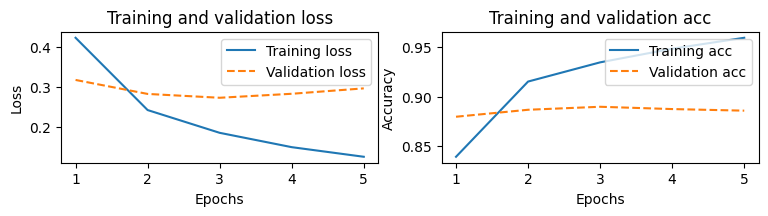

Training model with:
 - 2 layers
 - 16 units
 - optimizer: rmsprop

Results:
Top validation accuracy: 0.890500009059906
reached at epoch: 1


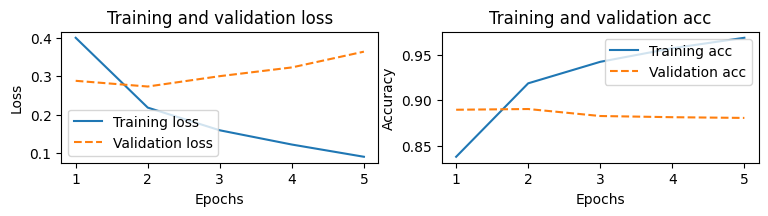

Training model with:
 - 3 layers
 - 16 units
 - optimizer: rmsprop

Results:
Top validation accuracy: 0.8819000124931335
reached at epoch: 1


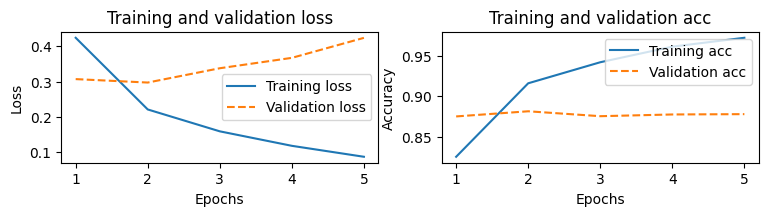

In [130]:
layers = [1,2,3]
optimizer = tf.keras.optimizers.RMSprop

all_layers_histories = []
all_layers_accs = []
all_layers_accs_epochs = []
all_layers_params = []

for n_layer in layers:
    hist, acc, acc_epoch = trainer(n_layer, 16, optimizer)
    plot_history(hist)
    all_layers_histories.append(hist)
    all_layers_accs.append(acc)
    all_layers_accs_epochs.append(acc_epoch)
    all_layers_params.append([n_layer, 16, optimizer])          

In [180]:
display_experiments(all_layers_histories, all_layers_accs, all_layers_accs_epochs, all_layers_params)

----------------------------------------------------------------------------------------------------
Result of this experiment:
--------------------------
Model with layer config: 1 layers,  16 units, rmsprop | top val accuracy: 0.889700 at epoch: 2
Model with layer config: 2 layers,  16 units, rmsprop | top val accuracy: 0.890500 at epoch: 1
Model with layer config: 3 layers,  16 units, rmsprop | top val accuracy: 0.881900 at epoch: 1

----------------------------------------------------------------------------------------------------
Best model found:
-----------------
Validation accuracy: 0.890500009059906 reached at epoch: 1
Hyperparameters:
 - 2 layers
 - 16 units
 - rmsprop
-----------------


One thing to notice straight from the start, is the presence of overfitting in every run (from epochs 1 or 2), even for those very small nets.

#### Experiment 2: units

- More or fewer hidden units

Training model with:
 - 1 layers
 - 4 units
 - optimizer: rmsprop

Results:
Top validation accuracy: 0.8885999917984009
reached at epoch: 3


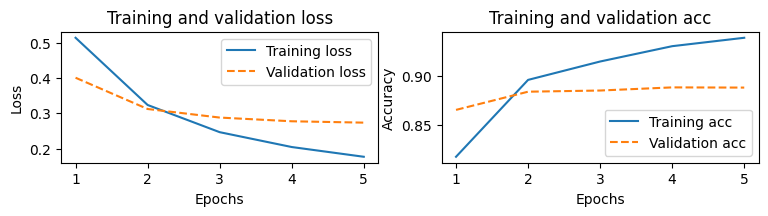

Training model with:
 - 1 layers
 - 8 units
 - optimizer: rmsprop

Results:
Top validation accuracy: 0.8906000256538391
reached at epoch: 2


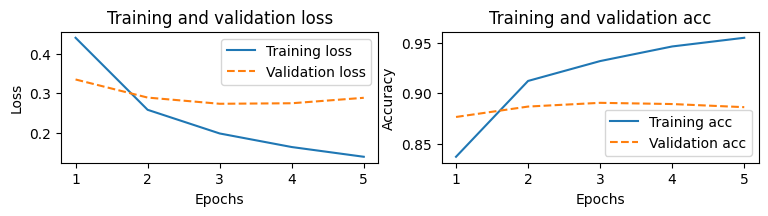

Training model with:
 - 1 layers
 - 16 units
 - optimizer: rmsprop

Results:
Top validation accuracy: 0.890999972820282
reached at epoch: 1


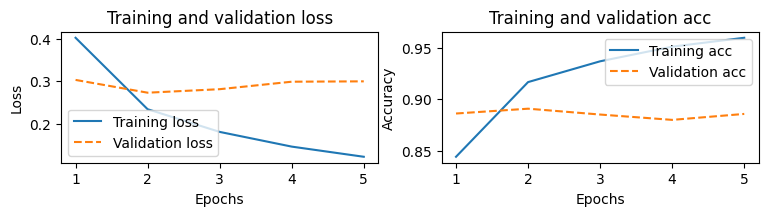

In [132]:
units = [4,8,16]
optimizer = tf.keras.optimizers.RMSprop

all_units_histories = []
all_units_accs = []
all_units_accs_epochs = []
all_units_params = []

for n_units in units:
    hist, acc, acc_epoch = trainer(1, n_units, optimizer)
    plot_history(hist)
    all_units_histories.append(hist)
    all_units_accs.append(acc)
    all_units_accs_epochs.append(acc_epoch)
    all_units_params.append([1, n_units, optimizer])          

In [181]:
display_experiments(all_layers_histories, all_layers_accs, all_layers_accs_epochs, all_layers_params)

----------------------------------------------------------------------------------------------------
Result of this experiment:
--------------------------
Model with layer config: 1 layers,  16 units, rmsprop | top val accuracy: 0.889700 at epoch: 2
Model with layer config: 2 layers,  16 units, rmsprop | top val accuracy: 0.890500 at epoch: 1
Model with layer config: 3 layers,  16 units, rmsprop | top val accuracy: 0.881900 at epoch: 1

----------------------------------------------------------------------------------------------------
Best model found:
-----------------
Validation accuracy: 0.890500009059906 reached at epoch: 1
Hyperparameters:
 - 2 layers
 - 16 units
 - rmsprop
-----------------


The same tools could be expanded to include:
- Activation: `relu` vs `tanh`
- Optimizer: `RMSprop` vs `Adam`

In fact, the ideal scenario would be to search through all parameters at the same time, even if the number of possibilities then quickly grows to unmanageable proportions.

#### Experiment 3: comparing RMSprop and Adam

We will construct the following experiment: build a series of small models one layer, and a varying number of units. We run two series of experiments, one with `RMSprop`, one with `Adam`, using the same list of units. We will then plot the respective performance between the two optimizers.

In [134]:
units = [2,4,6,8,16,32,64,128]

# --------------------------------------------
print(f"Training nets with with RMSprop")
print(f"units: {units}")

optimizer = tf.keras.optimizers.RMSprop

all_rms_histories = []
all_rms_accs = []
all_rms_accs_epochs = []
all_rms_params = []

for n_units in units:
    hist, acc, acc_epoch = trainer(1, n_units, optimizer, verbose=False)
    # plot_history(hist)
    all_rms_histories.append(hist)
    all_rms_accs.append(acc)
    all_rms_accs_epochs.append(acc_epoch)
    all_rms_params.append([1, n_units, optimizer])

# --------------------------------------------
print(f"Training nets with with Adam")
print(f"units: {units}")

optimizer = tf.keras.optimizers.Adam

all_adam_histories = []
all_adam_accs = []
all_adam_accs_epochs = []
all_adam_params = []

for n_units in units:
    hist, acc, acc_epoch = trainer(1, n_units, optimizer, verbose=False)
    # plot_history(hist)
    all_adam_histories.append(hist)
    all_adam_accs.append(acc)
    all_adam_accs_epochs.append(acc_epoch)
    all_adam_params.append([1, n_units, optimizer])

Training nets with with RMSprop
units: [2, 4, 6, 8, 16, 32, 64, 128]
Training nets with with Adam
units: [2, 4, 6, 8, 16, 32, 64, 128]


In [182]:
display_experiments(all_rms_histories, all_rms_accs, all_rms_accs_epochs, all_rms_params)

----------------------------------------------------------------------------------------------------
Result of this experiment:
--------------------------
Model with layer config: 1 layers,   2 units, rmsprop | top val accuracy: 0.893000 at epoch: 3
Model with layer config: 1 layers,   4 units, rmsprop | top val accuracy: 0.890400 at epoch: 3
Model with layer config: 1 layers,   6 units, rmsprop | top val accuracy: 0.891400 at epoch: 2
Model with layer config: 1 layers,   8 units, rmsprop | top val accuracy: 0.891900 at epoch: 2
Model with layer config: 1 layers,  16 units, rmsprop | top val accuracy: 0.887500 at epoch: 2
Model with layer config: 1 layers,  32 units, rmsprop | top val accuracy: 0.888500 at epoch: 1
Model with layer config: 1 layers,  64 units, rmsprop | top val accuracy: 0.887700 at epoch: 0
Model with layer config: 1 layers, 128 units, rmsprop | top val accuracy: 0.879000 at epoch: 3

------------------------------------------------------------------------------------

In [183]:
display_experiments(all_adam_histories, all_adam_accs, all_adam_accs_epochs, all_adam_params)

----------------------------------------------------------------------------------------------------
Result of this experiment:
--------------------------
Model with layer config: 1 layers,   2 units, adam | top val accuracy: 0.891300 at epoch: 2
Model with layer config: 1 layers,   4 units, adam | top val accuracy: 0.890900 at epoch: 3
Model with layer config: 1 layers,   6 units, adam | top val accuracy: 0.890900 at epoch: 1
Model with layer config: 1 layers,   8 units, adam | top val accuracy: 0.890100 at epoch: 1
Model with layer config: 1 layers,  16 units, adam | top val accuracy: 0.890300 at epoch: 1
Model with layer config: 1 layers,  32 units, adam | top val accuracy: 0.887200 at epoch: 0
Model with layer config: 1 layers,  64 units, adam | top val accuracy: 0.889200 at epoch: 0
Model with layer config: 1 layers, 128 units, adam | top val accuracy: 0.885000 at epoch: 0

----------------------------------------------------------------------------------------------------
Best mo

In this small series of experiments, we find that `RMSprop` yields the best validation accuracy, $0.8930000066757202$, (as opposed to Adam, $0.8913000226020813$), although the difference is not significant.

A plot might help us have more of an overview of those values:

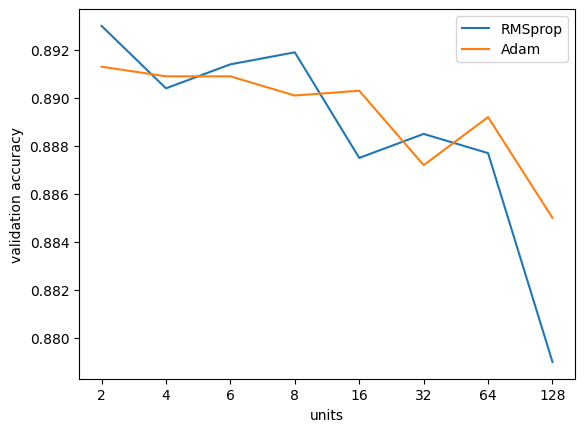

In [168]:
# use 1,2,3... as x, but re-label them as 2,4,6 using data in units
plt.plot(range(len(units)), all_rms_accs, label="RMSprop")
plt.plot(range(len(units)), all_adam_accs, label="Adam")
plt.xticks(range(len(units)), labels=[str(u) for u in units])
plt.xlabel("units")
plt.ylabel("validation accuracy")
plt.legend()
plt.show()

Looking at the plot as it is, it might be tempting to draw conclusions about the decline in performance of the two optimizers as we increase the number of of units, and note the maximum value obtained with RMSprop for a very small net (2 units).

However, if we make sure to have a reasonable scale in our plot (between 0 and 1), the picture is quite different!

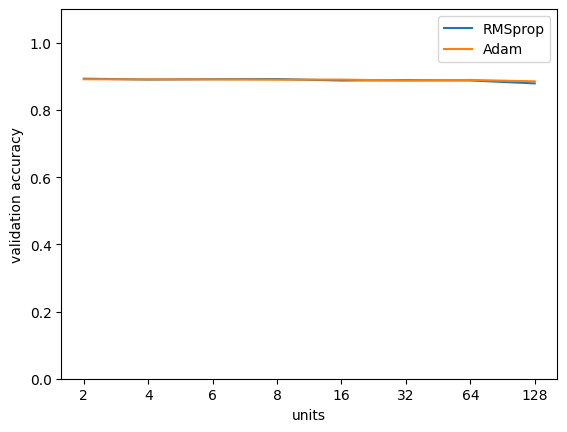

In [169]:
# use 1,2,3... as x, but re-label them as 2,4,6 using data in units
plt.plot(range(len(units)), all_rms_accs, label="RMSprop")
plt.plot(range(len(units)), all_adam_accs, label="Adam")
plt.xticks(range(len(units)), labels=[str(u) for u in units])
plt.xlabel("units")
plt.ylabel("validation accuracy")
plt.ylim([0,1.1]) # adjust the scale!
plt.legend()
plt.show()

We note that, overall, for this simple set-up, the two optimizers achieve remarkably similar performance, and the 'degradation' seen in the previous plot is barely noticeable here.

## 3. Conclusion

Take your best network and train on **all the training data** (`x_train`, `y_train`), without a train/validation split, using the same hyperparameters (optimizer, learning rate, network size, etc.) as your best run, for the optimal number of epochs (looking at your best validation curves).

### Final model

In [193]:
def final_trainer(n_layers, n_units, optimizer, best_epoch):
    opt = optimizer() # instatiate the optimizer (so we can retrieve its name, hehe)
    print(f"Training model with:")
    print(f" - {n_layers} layers")
    print(f" - {n_units} units")
    print(f" - optimizer: {opt.name}")
    print(f" - best epoch: {best_epoch + 1}")
    # build
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input((10000,)))
    for _ in range(n_layers):
        model.add(tf.keras.layers.Dense(n_units, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    
    model.compile(
        optimizer=opt,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )  
    # save data from training into the 'history' object
    history = model.fit(
        x_train, # ENTIRE TRAINING DATA
        y_train,
        epochs=best_epoch + 1,
        batch_size=128,
        # NO VALIDATION
        verbose=0, # no need for all this logging
    )
    return model, history

Note for future improvement: it would be good to have only one trainer function, that can include validation or not!

The selection performed in the next cell is also not equivalent to full grid search, and only done here for pragmatic reasons: the best hyperparameters out of those four runs will certainly yield our best result so far, but it is by no means a way of bypassing the full exploration of hyperparameter space (had we created runs that created combinations of different layers, units, and optimizers)!

In [209]:
# it would be even better to automate that process
aggregate = [max(all_layers_accs), max(all_units_accs), max(all_rms_accs), max(all_adam_accs)]
# print(aggregate)
top = np.argmax(aggregate)

best_acc = aggregate[top]
print(f"Our best result was among experiments #{top+1}: accuracy: {best_acc}.")

Our best result was among experiments #3: accuracy: 0.8930000066757202


In this case, our best experiment was the best run we had when comparing `RMSprop` and `Adam`:

In [214]:
best_ind = np.argmax(all_rms_accs)
best_epoch = all_rms_accs_epochs[best_ind]
print(f"Our params were: {all_rms_params[best_ind]}, epoch: {best_epoch}.")

Our params were: [1, 2, <class 'keras.src.optimizers.rmsprop.RMSprop'>], epoch: 3.


Now we can train a model on the entire training set, for the 

In [221]:
model, _ = final_trainer(1, 2, tf.keras.optimizers.RMSprop, best_epoch) # my param

Training model with:
 - 1 layers
 - 2 units
 - optimizer: rmsprop
 - best epoch: 4


Evaluate this last model on the test set (`x_test, y_test`).

In [222]:
result = model.evaluate(x_test, y_test)
print("Final results:")
print(f"Loss: {result[0]}, accuracy: {result[1]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.8796 - loss: 0.3796
Final results:
Loss: 0.38062718510627747, accuracy: 0.8809199929237366


Our best model reaches a validation accuracy of $0.8809199929237366$, $88\%$ accuracy on the test set!

### Use your model (optional)

Can you import the lecture code used to test the model on a review, and see if you agree with its prediction?

In [135]:
def review_finder(prediction, label):
    for i in range(len(x_test)):
        y_pred = round(model.predict(x_test[i:i+1], verbose=0)[0, 0])
        if y_pred == prediction and test_labels[i] == label:
            yield i

def print_review(n):
    word_index = tf.keras.datasets.imdb.get_word_index()
    reverse_word_index = {value:key for key,value in word_index.items()}
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[n]])

    y_pred = model.predict(x_test[n:n+1], verbose=0)[0,0]
    print(f"review: {n} | predicted: {y_pred:.6f} | rounded: {round(y_pred)} | label: {test_labels[n]}")
    print()
    print(decoded_review, '\n')

def select_nth_review(iterator, n):
    for i, r in enumerate(iterator):
        if i < n: # skip until n
            continue
        if i == n:
            print_review(r)
        if i > n: # stop after n
            break

In [136]:
neg_neg = review_finder(prediction=0, label=0)
select_nth_review(neg_neg, 3)

review: 12 | predicted: 0.000027 | rounded: 0 | label: 0

? oh dear oh dear it really gets on my nerves when a low budget pointless horror affair tries to look interesting in the credits by having a bunch of good names pop up in the cast only to involve each one in the smallest most pointless possible roles in this film we have richard lynch in one scene a ? appearance from martin ? a brief spot for ? welles slightly more time on screen for john philip law and a little time for karen black this bunch of random cameos does not really add up to much though richard lynch and karen black do raise some of the few smiles of this film with their appearances and its quite painful really as none of the main cast are much good at all i couldn't help but think that if more scenes were filmed with any of the b movie veterans above the film would be a whole lot better but as it is there are just a few ? glimpses of good entertainment without the film ever actually ? much entertainment value of the 

In [138]:
pos_pos = review_finder(prediction=1, label=1)
select_nth_review(pos_pos, 10)

review: 21 | predicted: 0.996997 | rounded: 1 | label: 1

? this is one of my favourite disney films it has everything you could hope for in a disney animation cute animals great songs a nasty villain and lots of adventure the story begins in paris where ? and her three ? live with their mistress in a mansion life is perfect for them until the ? butler edgar discovers that she plans to leave her entire fortune to the cats he realises that if he even stands a chance of claiming the fortune the cats will be out of the way an excellent often forgotten masterpiece from the 1970's a time when the disney studio made few animations which features songs such as the title number the ? as well as wants to be a cat this will ? viewers young and old with its enduring 



In [139]:
neg_pos = review_finder(prediction=0, label=1)
select_nth_review(neg_pos, 20)

review: 187 | predicted: 0.003094 | rounded: 0 | label: 1

? man of the year tells the story of tom ? robin williams a political comedian like jon stewart or stephen ? who has his own television show on his show he talks about all sorts of things but his main focus are political issues which he is very ? about one day on his show a fan from the audience raises the idea that ? should run for president of the united states after that episode aired millions ? to the web to create various and voice their opinions on why ? would make a great candidate for the president for the united states a few weeks later ? decides to run for president and low and behold wins the election everything seems to be going as planned until a woman by the name of ? green laura ? shows up and starts some controversy regarding his position a funny yet serious political thriller br br man anyone walking into this film expecting to see a brainless comedy will surely be disappointed i always wonder how some people a

### Save and load models

To save and load models locally, you can use [the high-level API](https://www.tensorflow.org/tutorials/keras/save_and_load):
```python
model.save("my_imdb_model.keras")
```
Later one, to reload it, use:
```python
reloaded_model = tf.keras.models.load_model('my_imdb_model.keras')
```

It is also possible to save not just the model, but also the state of your optimiser, and every variable used during training, using the morer involved [checkpoints](https://www.tensorflow.org/guide/checkpoint#create_the_checkpoint_objects).

## 4. Additional experiments

#### Experiment: Vocab size

- One parameter you could study is the influence on the vocabulary size on the final results: you might then want to store the vocab size in a variable, and use that instead of the hard-coded `10000` that we have.

In [92]:
def trainer_with_data(
    partial_x_train, partial_y_train, x_val, y_val,
    input_shape, n_layers, n_units, optimizer, n_epochs=5, verbose=True
):
    optimizer = optimizer() # instantiate the optimizer for this run
    if verbose:
        print(f"Training model with:")
        print(f" - {n_layers} layers")
        print(f" - {n_units} units")
        print(f" - optimizer: {optimizer.name}")
    # build
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input((input_shape,)))
    for _ in range(n_layers):
        model.add(tf.keras.layers.Dense(n_units, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    
    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )  
    # save data from training into the 'history' object
    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=n_epochs,
        batch_size=128,
        validation_data=(x_val, y_val),
        verbose=0, # no need for all this logging
    )
    top_val_acc_epoch = np.argmax(history.history["val_accuracy"])
    top_val_acc = history.history["val_accuracy"][top_val_acc_epoch]
    if verbose:
        print()
        print("Results:")
        print(f"Top validation accuracy: {top_val_acc}")
        print(f"reached at epoch: {top_val_acc_epoch}")
    return history, top_val_acc, top_val_acc_epoch

def test_vocabulary_size(vocab_size):
    
    # load the IMDB dataset (max review length
    (train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)
    
    # preprocess
    x_train = vectorize_sequences(train_data, dimension=vocab_size)
    x_test = vectorize_sequences(test_data, dimension=vocab_size)
    
    y_train = np.asarray(train_labels).astype("float32")
    y_test = np.asarray(test_labels).astype("float32")
    
    # split training set into train & validation
    partial_x_train = x_train[10000:]
    partial_y_train = y_train[10000:]
    x_val = x_train[:10000]
    y_val = y_train[:10000]

    return trainer_with_data(
        partial_x_train, partial_y_train, x_val, y_val,
        vocab_size, 1, 16, tf.keras.optimizers.RMSprop, verbose=False)

In [237]:
vocab_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000]
longest_v = len(str(max(vocab_sizes)))

# --------------------------------------------
print(f"Training nets with with varying vocabulary sizes")

optimizer = tf.keras.optimizers.RMSprop

# all_vocab_histories = []
all_vocab_accs = []
all_vocab_accs_epochs = []
# all_vocab_params = []

for vocab in vocab_sizes:
    hist, acc, acc_epoch = test_vocabulary_size(vocab)
    # plot_history(hist)
    # all_vocab_histories.append(hist)
    all_vocab_accs.append(acc)
    all_vocab_accs_epochs.append(acc_epoch)
    # all_vocab_params.append([1, n_units, optimizer])
    print(f"- {vocab:>{longest_v}} words, validation accuracy: {acc}")

argmax_acc = np.argmax(all_vocab_accs)
max_acc = max(all_vocab_accs)

print()
print(f"Best model: {vocab_sizes[argmax_acc]:>{longest_v}} words, validation accuracy: {max_acc}, at epoch {all_vocab_accs_epochs[argmax_acc]}")

Training nets with with varying vocabulary sizes
-   100 words, validation accuracy: 0.6956999897956848
-   500 words, validation accuracy: 0.8292999863624573
-  1000 words, validation accuracy: 0.8611999750137329
-  2000 words, validation accuracy: 0.873199999332428
-  5000 words, validation accuracy: 0.8862000107765198
- 10000 words, validation accuracy: 0.8866999745368958
- 20000 words, validation accuracy: 0.888700008392334

Best model: 20000 words, validation accuracy: 0.888700008392334, at epoch 0


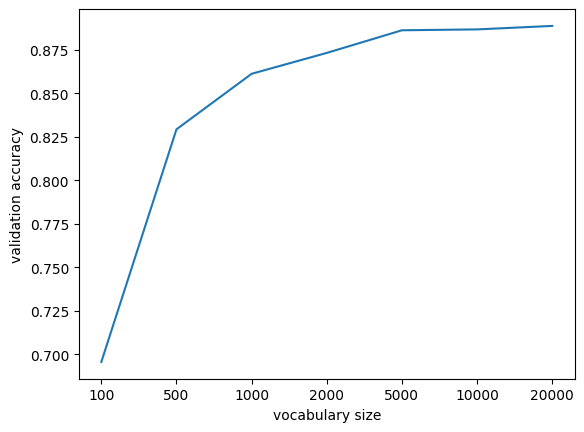

In [238]:
# use 1,2,3... as x, but re-label them as 2,4,6 using data in units
plt.plot(range(len(vocab_sizes)), all_vocab_accs)
plt.xticks(range(len(vocab_sizes)), labels=[str(u) for u in vocab_sizes])
plt.xlabel("vocabulary size")
plt.ylabel("validation accuracy")
plt.show()

The increase in vocabulary size is strongly correlated with an increase in validation accuracy! What can be noted as well, is that the rate of increase slows down gradually, and even seems to nearly plateau from $5000$ words onward. With this set-up, for instance, if reaching $80\%$ were acceptable, we would be able to cut down our vocabulary size to 500, or even lower, and make gains on compute that way.

#### Sentiment using two classes

- It would be entirely possible to approach the same problem as if you were detecting two classes (`0` for negative, `1` for positive), instead of using just a single output. In order to implement that, you would need:
   1. two units in your final layer with a `softmax` activation;
   2. `categorical_crossentropy` as a loss;
   3. labels as one-hot vectors (using `tf.keras.utils.to_categorical`);
   4. and `np.argmax` (instead of `round`) to retrieve the likeliest class (the index) when making predictions.

In [102]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

# split training set into train & validation
partial_y_train_one_hot = y_train_one_hot[10000:]
y_val_one_hot = y_train_one_hot[:10000]

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7720 - loss: 0.4952 - val_accuracy: 0.8888 - val_loss: 0.2897
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9197 - loss: 0.2245 - val_accuracy: 0.8737 - val_loss: 0.3079
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9446 - loss: 0.1613 - val_accuracy: 0.8835 - val_loss: 0.2903
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9577 - loss: 0.1276 - val_accuracy: 0.8840 - val_loss: 0.3025
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9685 - loss: 0.1023 - val_accuracy: 0.8831 - val_loss: 0.3271
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9751 - loss: 0.0844 - val_accuracy: 0.8797 - val_loss: 0.3554
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9813 - loss: 0.0669 - val_accuracy: 0.8688 - val_loss: 0.4334
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9838 - loss: 0.0582 - val_accuracy: 0.

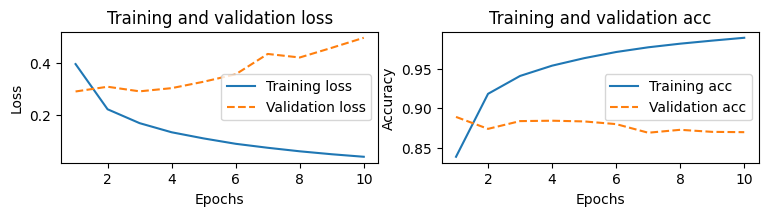

In [151]:
# build
categorical_model = tf.keras.models.Sequential()
categorical_model.add(tf.keras.Input((10000,)))
categorical_model.add(tf.keras.layers.Dense(16, activation="relu"))
categorical_model.add(tf.keras.layers.Dense(2, activation="softmax"))

categorical_model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)  
# save data from training into the 'history' object
history = categorical_model.fit(
    partial_x_train,
    partial_y_train_one_hot,
    epochs=10,
    batch_size=128,
    validation_data=(x_val, y_val_one_hot),
)
top_val_acc_epoch = np.argmax(history.history["val_accuracy"])
top_val_acc = history.history["val_accuracy"][top_val_acc_epoch]
plot_history(history)

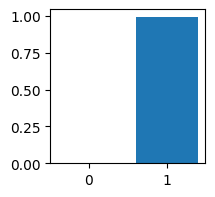

review: 5 | top prob: 0.995139 for class: 1 | label: 1

? i'm absolutely disgusted this movie isn't being sold all who love this movie should email disney and increase the demand for it they'd eventually have to sell it then i'd buy copies for everybody i know everything and everybody in this movie did a good job and i haven't figured out why disney hasn't put this movie on dvd or on vhs in rental stores at least i haven't seen any copies this is a wicked good movie and should be seen by all the kids in the new generation don't get to see it and i think they should it should at least be put back on the channel this movie doesn't deserve a cheap ? it deserves the real thing i'm them now this movie will be on dvd 



In [164]:
def print_review_categorical(n):
    word_index = tf.keras.datasets.imdb.get_word_index()
    reverse_word_index = {value:key for key,value in word_index.items()}
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[n]])

    probs = categorical_model.predict(x_test[n:n+1], verbose=0)[0]
    plt.figure(figsize=(2,2))
    plt.bar(range(len(probs)), probs)
    plt.show()
    print(f"review: {n} | top prob: {max(probs):.6f} for class: {np.argmax(probs)} | label: {test_labels[n]}")
    print()
    print(decoded_review, '\n')

print_review_categorical(5)

#### Test the model on homemade reviews

- Another line of enquiry is the study of the behaviour of your trained model:
  - Are you able to modify existing reviews in a way that changes the initial prediction of your model? (One 'automated' way of doing that would be to remove a certain number of words from the review, and see how performance is impacted by that information loss.)
  - Are you able to create a pipeline where you write your own review, or find one online, transform it into the appropriate format (remove punctuation, turn everything to lower case, convert to an array of integers using the dictionary yielded by `tf.keras.datasets.imdb.get_word_index()` (beware of the shift by 3 induced by the reserved tokens for padding, start of sequence and unknown!), and see what prediction you get for it?

In [223]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [224]:
word_index = tf.keras.datasets.imdb.get_word_index()
reverse_word_index = {value:key for key,value in word_index.items()}

In [225]:
word_index = tf.keras.datasets.imdb.get_word_index()
# limit possible words to 10000
word_index = { k:v for k,v in word_index.items() if v <= 10000}
reverse_word_index = {value:key for key,value in word_index.items()}

def process_review(rev, verbose=False):
    # lower case + + no newlines + no punctuation + split on space
    rev = rev.lower().replace("\n", " ").translate(str.maketrans('', '', string.punctuation)).split(" ")
    if verbose:
        print(rev)
    # 0 for padding, 1 for start of sequence, 2 for unknown
    # adding 3 to the word index to account for the first reserved tokens
    # using `.get()`: if w is not in word_index, use -1+3 = 2: 'unknown'
    rev_encoded = [word_index.get(w, -1) + 3 for w in rev]
    if verbose:
        print(rev_encoded)
        print()
    return rev_encoded

def print_review(review_arr, label):
    decoded_review = ' '.join([reverse_word_index.get(i - 3, "?") for i in review_arr])
    review_multihot_batch = vectorize_sequences([review_arr])
    # print(review_multihot_batch.shape)
    y_pred = model.predict(review_multihot_batch, verbose=0)[0,0]
    print("Predicting manually written review:")
    print(f"predicted: {y_pred:.6f} | rounded: {round(y_pred)} | label: {label}")
    print()
    print(decoded_review)

In [226]:
review = """
Crazy! This new film about an alien invasion at Goldsmiths College, is, frankly, awesome!
Best film in the decade
"""

# testing if the review is correctly encoded then decoded
print_review(process_review(review, verbose=True), 1)

['', 'crazy', 'this', 'new', 'film', 'about', 'an', 'alien', 'invasion', 'at', 'goldsmiths', 'college', 'is', 'frankly', 'awesome', 'best', 'film', 'in', 'the', 'decade', '']
[2, 932, 14, 162, 22, 44, 35, 1536, 4710, 33, 2, 1170, 9, 2035, 1190, 118, 22, 11, 4, 2068, 2]

Predicting manually written review:
predicted: 0.682450 | rounded: 1 | label: 1

? crazy this new film about an alien invasion at ? college is frankly awesome best film in the decade ?


In [227]:
review = """
Crazy! This new film about an alien invasion at Goldsmiths College, is, frankly, weird!
Worst film in the decade.
"""
# testing if the review is correctly encoded then decoded
print_review(process_review(review), 0)

Predicting manually written review:
predicted: 0.295778 | rounded: 0 | label: 0

? crazy this new film about an alien invasion at ? college is frankly weird worst film in the decade ?


Can I write a review that will be misclassified by the net?

In [228]:
review = """Wow! This new film about an alien invasion at Goldsmiths College, is, frankly, a beautiful 
masterpiece of evil. A film I would recommend to my enemies without hesitation, especially the ones I respect 
the most, so that they lose their minds.
"""
# testing if the review is correctly encoded then decoded
print_review(process_review(review), 0)

Predicting manually written review:
predicted: 0.682450 | rounded: 1 | label: 0

wow this new film about an alien invasion at ? college is frankly a beautiful ? masterpiece of evil a film i would recommend to my enemies without ? especially the ones i respect ? the most so that they lose their minds ?


Yay, success!